# ***Sales Prediction using Logistic Regression***

Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

choosing data set from local directory

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


Load Dataset

In [5]:
dataset = pd.read_csv("DigitalAd_dataset.csv")

Summarizing Data

In [7]:
dataset.shape

(400, 3)

In [8]:
dataset.head(7)

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
5,48,29000,1
6,45,22000,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [11]:
dataset.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


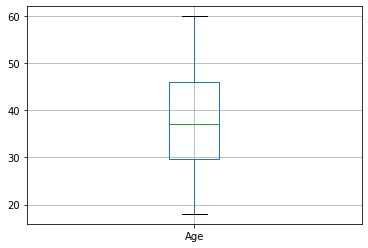

In [20]:
dataset.boxplot(column = 'Age')

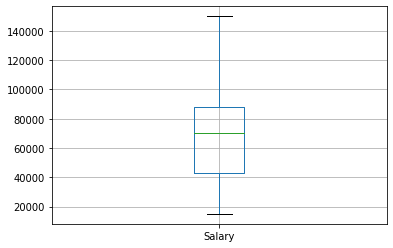

In [18]:
dataset.boxplot(column = 'Salary')

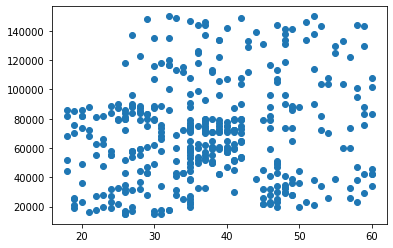

In [54]:
plt.scatter(dataset['Age'], dataset['Salary'])

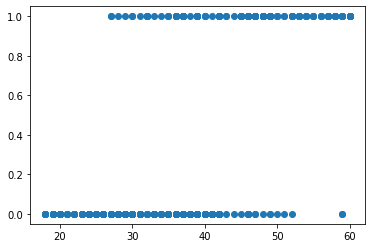

In [55]:
plt.scatter(dataset['Age'], dataset['Status'])

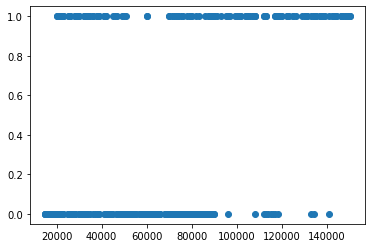

In [57]:
plt.scatter(dataset['Salary'], dataset['Status'])

Segregate Dataset into X(Input/Independent Variable) & Y(Output/Dependent Variable)

In [48]:
## iloc[rows,columns]
## : means all rows
## :-1 all columns exlcuding last column

X= dataset.iloc[:,:-1].values
X

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [50]:
Y=dataset.iloc[:,-1].values
Y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

Splitting Dataset into train and test

train_test_split resource:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

## random_state is zero that is why it wont split the data randomly

In [59]:
len(X_test)

100

In [60]:
len(y_test)

100

In [61]:
len(X_train)

300

In [62]:
len(y_train)

300

In [ ]:
### the X and Y is split in 25:75 ratio that is 100:300 as total of  400 rows

In [63]:
X_train

array([[    48,  90000],
       [    22,  27000],
       [    41,  72000],
       [    34,  43000],
       [    43, 112000],
       [    36,  99000],
       [    35,  44000],
       [    42,  79000],
       [    35,  71000],
       [    38,  50000],
       [    39,  71000],
       [    33, 149000],
       [    42,  70000],
       [    35,  27000],
       [    58,  23000],
       [    35, 147000],
       [    39, 106000],
       [    32, 120000],
       [    48, 134000],
       [    41,  72000],
       [    26,  35000],
       [    37,  80000],
       [    41,  52000],
       [    35,  50000],
       [    47,  23000],
       [    46,  59000],
       [    33,  28000],
       [    40,  75000],
       [    42, 104000],
       [    32, 117000],
       [    33,  69000],
       [    32, 150000],
       [    30,  80000],
       [    50,  44000],
       [    40, 107000],
       [    40,  57000],
       [    41,  60000],
       [    40, 142000],
       [    53, 104000],
       [    27, 137000],


In [64]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [67]:
X_test

array([[    27,  96000],
       [    48,  30000],
       [    60,  34000],
       [    48,  96000],
       [    35,  77000],
       [    32,  18000],
       [    29,  47000],
       [    57,  74000],
       [    31,  15000],
       [    40,  72000],
       [    18,  44000],
       [    29,  61000],
       [    26,  32000],
       [    47,  50000],
       [    49,  28000],
       [    33, 113000],
       [    47, 113000],
       [    40,  47000],
       [    41,  80000],
       [    35,  58000],
       [    24,  84000],
       [    37,  70000],
       [    28,  59000],
       [    40,  71000],
       [    28,  32000],
       [    42,  75000],
       [    26,  15000],
       [    31,  18000],
       [    58,  38000],
       [    35,  75000],
       [    33,  60000],
       [    35,  55000],
       [    39,  77000],
       [    53, 143000],
       [    26,  17000],
       [    22,  81000],
       [    19,  21000],
       [    33,  41000],
       [    19,  70000],
       [    32,  18000],


In [66]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

Feature Scaling:

we scale our data to make all the features contribute equally to the result

fit_transform - fit method is calculating the mean and variance of each of the feature present in our data

transform - transform method is transforming all the features using the respective mean and variance




In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

## we are only doing it for the X because y is either 0 or 1 so we do not need to rescale it

Training:

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

Prediction:
whether new customer with input age and Salary will buy or not?

In [70]:
age =int(input("Enter New customer's Age:"))
sal = int(input("Enter New customer's Salary:"))
newCust = [[age, sal]]
result= model.predict(sc.transform(newCust))
print(result)

if result==1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")
  

Enter New customer's Age:30
Enter New customer's Salary:20000
[0]
Customer won't Buy


Prediction for all Test data

In [82]:
y_pred = model.predict(X_test)


In [84]:
a=len(y_pred)
a

100

In [86]:
b=len(y_test)
b

100

In [80]:
y_pred.reshape(a,1)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [81]:
y_test.reshape(b,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [93]:
###print(np.concatenate((y_pred.reshape(a,1), y_test.reshape(b,1)),1))
### this is same as below

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
Evaluating Model:
Using confusion Matrix 

Accuracy = (TP+TN)/ (TP+TN+FN+FP)


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%" .format(accuracy_score(y_test, y_pred)*100))

confusion Matrix: 
[[61  0]
 [20 19]]
Accuracy of the Model: 80.0%
